# AprilTag pose estimation without `ROS`

In [1]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt

# Setup:
pipe = rs.pipeline()
cfg = rs.config()
profile = pipe.start(cfg)

In [2]:
# for x in range(5):
#   pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
rgb_image = frameset.get_color_frame()
depth_image = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


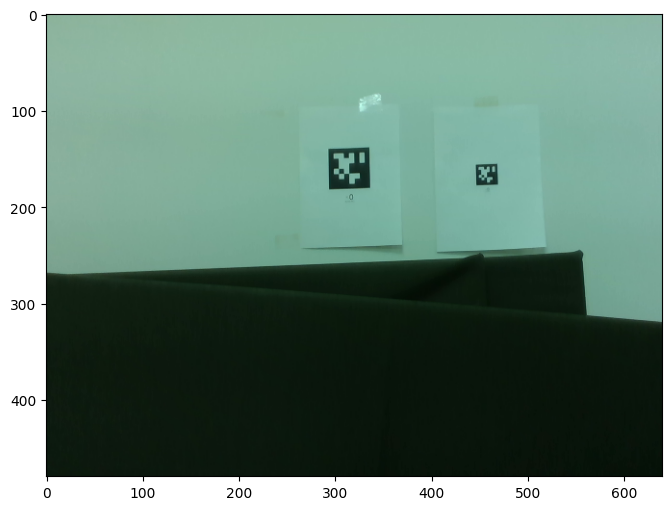

In [3]:
rgb_image = np.asanyarray(rgb_image.get_data())
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(rgb_image)
plt.show()

# AprilTag pose estimation with `ROS`

In [ ]:
import sys 
sys.path.append("..")
import matplotlib.pyplot as plt 
from utils.utils_pcl import *
from utils.utils_pointcloud import *
import cv2 
import rospy 
from get_rostopic import RealsenseD435i

# from roslib import message
print("Done.")

In [22]:
def plot_rgb_imgae(msg_image, name):
    bridge = cv_bridge.CvBridge()
    img_shape = (640, 480)
    try:
        cv_image_array = bridge.imgmsg_to_cv2(msg_image, "32FC3")
        cv_image_array = np.array(cv_image_array, dtype = np.dtype('f8'))
        np.save("./data/npy/{}.npy".format(name), cv_image_array)
        cv2.imwrite('./data/png/{}.png'.format(name), cv_image_array*1)
        plt.figure(figsize=(10,10))
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.imshow(cv_image_array[:,:,i])
        plt.show()

        cv_image_array = cv2.resize(cv_image_array, img_shape, interpolation = cv2.INTER_CUBIC)
        cv_image_array = cv2.normalize(cv_image_array, cv_image_array, 0, 255, cv2.NORM_MINMAX)
        np.save("./realworld_data/npy/{}_raw.npy".format(name), cv_image_array.astype(np.float32))
        cv2.imwrite('./realworld_data/png/{}_raw.png'.format(name), cv_image_array)
        plt.figure(figsize=(10,10))
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.imshow(cv_image_array[:,:,i])
        plt.show()

        return cv_image_array

    except cv_bridge.CvBridgeError as e:
        print(e) 


### Setup and plot image

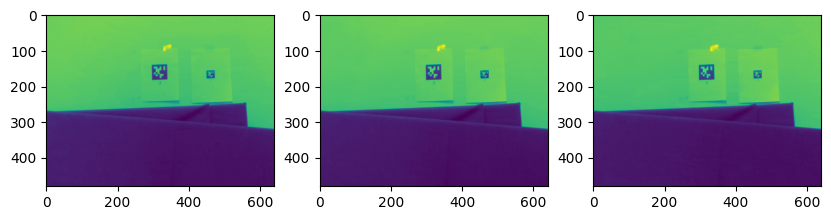

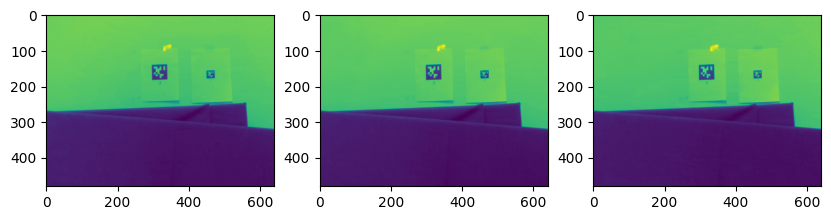

In [23]:
rospy.init_node('Realsense')
# mode     = "pointcloud"
# mode     = "depth"
mode     = "rgb"

camera   = RealsenseD435i(mode=mode)
name = "230205_test1"

if mode=="depth":
    save_depth_img(msg_depth = camera.depth_image, name = name) 
    np_depth = ros_to_numpy(camera.depth_image)
    print("Shape: {}".format(np_depth.shape))
elif mode == "rgb":
    img_rgb = plot_rgb_imgae(msg_depth = camera.rgb_image, name = name) 
else: 
    save_pc(msg_pc=camera.point_cloud, name=name)
    np_point = ros_to_numpy(camera.point_cloud)
    # print(camera.point_cloud)
    print("Shape: {}".format(np_point.shape))


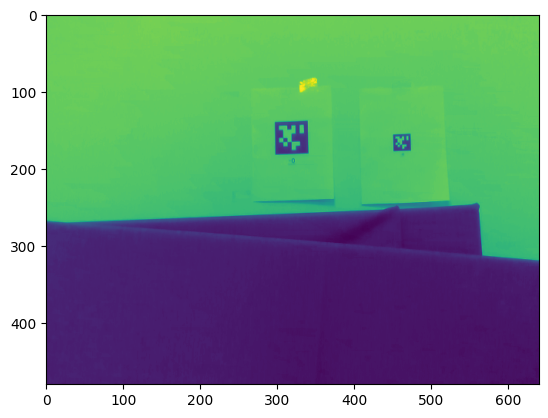

In [15]:
plt.imshow(img_rgb[:,:,0])
plt.show()

# Get RGB image

In [4]:
import pyrealsense2 as rs
import numpy as np
import cv2

# Configure the pipeline
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
pipeline.start(config)

# Wait for a frame and retrieve color data
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()

# Convert the color frame to a numpy array
color_image = np.asanyarray(color_frame.get_data())

# Display the color image
cv2.imshow('Color', color_image)



RuntimeError: No device connected

### Plot: Real-World

In [15]:
img_rgb.shape

(480, 640)